In [5]:
import pandas as pd
#import pandas.io.sql as sqlio
#from pyathenajdbc import connect
import itertools
from collections import defaultdict
import numpy as np
from math import factorial
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv('data.csv')

In [7]:
df.head()

,channels,conversions
0,"Off-Facebook Installs,Branch,Instagram Install...",0
1,"Off-Facebook Installs,Organic,Instagram Installs",0
2,"Instagram Installs,Leadbolt,Facebook Installs",2
3,"Leadbolt,Off-Facebook Installs,Branch",5
4,"Branch,Leadbolt,Instagram Installs",0


In [12]:
channels = ['Instagram Installs', 'Adwords UAC Installs', 'Leadbolt',
            'Branch', 'Facebook Installs', 'Organic', 'Off-Facebook Installs',
            'AppNext','Facebook Messenger Installs']

In [8]:
def subsets(s):
    # This function returns all the possible subsets of a set of channels
    # s: set of channels
    if len(s)==1:
        return s
    else:
        sub_channels=[]
        for i in range(1,len(s)+1):
            sub_channels.extend(map(list,itertools.combinations(s, i)))
    return map(",".join,map(sorted,sub_channels))

In [9]:
def v_function(A,C_values):
    # This function computes the worth of each coalition.
    #  
    # A : a coalition of channels.
    # C_values : A dictionnary containing the number of conversions that each subset of channels has yielded.
    
    subsets_of_A = subsets(A.split(","))
    worth_of_A=0
    for subset in subsets_of_A:
        if subset in C_values:
            worth_of_A += C_values[subset]
    return worth_of_A

In [10]:
# converting dataframe "subsets_conversions" into a dictionnary
C_values = df.set_index("channels").to_dict()["conversions"]

In [13]:
# For each possible combination of channels A, we compute the total number of conversions yielded by every subset of A. 
# Example : if A = {c1,c2}, then v(A) = C({c1}) + C({c2}) + C({c1,c2})

v_values = {}

for A in subsets(channels):
    v_values[A] = v_function(A,C_values)

In [14]:
n = len(channels)
shapley_values = defaultdict(int)

In [15]:
for channel in channels:
    for A in v_values.keys():
        if channel not in A.split(","):
            cardinal_A=len(A.split(","))
            A_with_channel = A.split(",")
            A_with_channel.append(channel)            
            A_with_channel=",".join(sorted(A_with_channel))
            shapley_values[channel] += (v_values[A_with_channel]-v_values[A])*(factorial(cardinal_A)*factorial(n-cardinal_A-1)/factorial(n))
    # Add the term corresponding to the empty set
    shapley_values[channel]+= v_values[channel]/n 

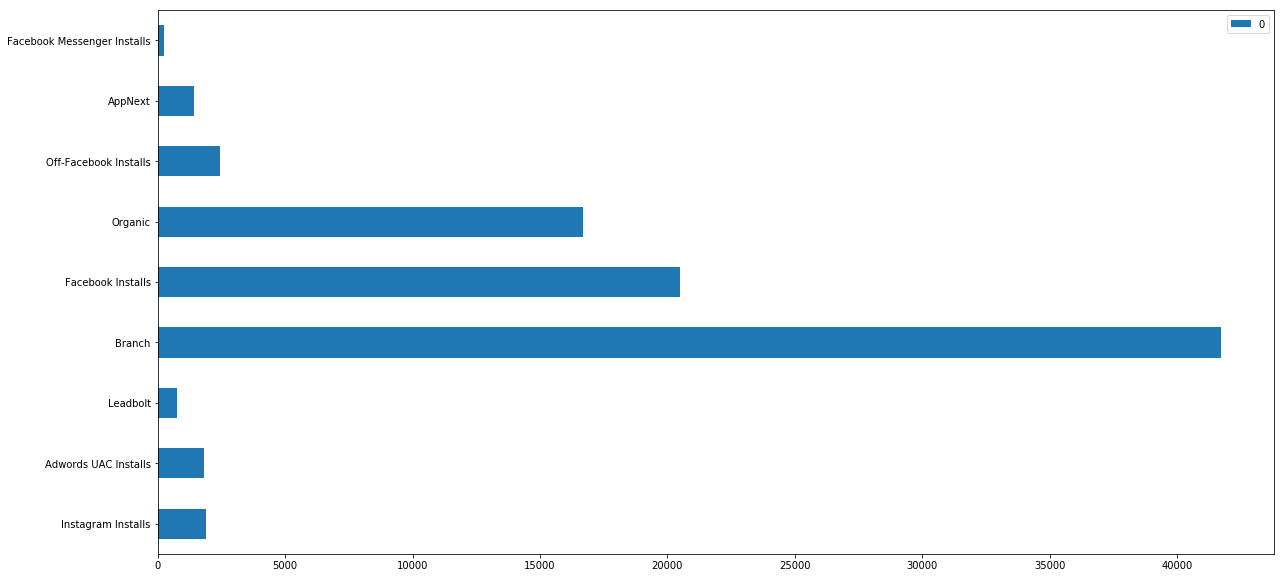

In [16]:
pd.DataFrame.from_dict(shapley_values, orient='index').plot(kind='barh', figsize=[20,10])
plt.show()

In [17]:
tmp = df[~df.channels.str.contains(',')]

In [18]:
tmp = tmp.groupby('channels').sum()

In [19]:
tmp.div(tmp.sum())*100.0

,conversions
channels,
Adwords UAC Installs,2.136413
AppNext,1.626847
Branch,48.086102
Facebook Installs,21.506649
Facebook Messenger Installs,0.247388
Instagram Installs,2.031542
Leadbolt,0.758299
Off-Facebook Installs,2.611022
Organic,20.995738


In [20]:
sdf = pd.DataFrame.from_dict(shapley_values, orient='index')

In [21]:
sdf.div(sdf.sum())*100.0

,0
Instagram Installs,2.177834
Adwords UAC Installs,2.084406
Leadbolt,0.848863
Branch,47.721683
Facebook Installs,23.435266
Organic,19.079597
Off-Facebook Installs,2.770818
AppNext,1.611735
Facebook Messenger Installs,0.269798
